# Procesamiento de Lenguaje Natural



**Pablo Martínez Olmos**

Departamento de Teoría de la Señal y Comunicaciones

**Universidad Carlos III de Madrid**

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Detección automática de frases y palabras clave

En esta sesión presentaremos algunas técnicas sencillas para obtener **frases y palabras clave de un documento**. Presentaremos técnicas simples pero potentes para extraer información importante de documentos de texto no estructurados. Éstas pueden utilizarse a efectos méramente de interpretabilidad, pero también como características (features) avanzadas una vez las combinemos con algún método de aprendizaje.


In [1]:
%matplotlib inline  
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'svg'  
# High quality figures
import matplotlib.pyplot as plt
import numpy as np


Utilizaremos el siguiente ejemplo 

In [2]:
DOCUMENT = """
Gears of War is a 2006 third-person shooter video game, the first installment of the Gears of War series. It was developed by Epic Games and published by Microsoft Game Studios, initially as an exclusive title for the Xbox 360 in November 2006, before a Microsoft Windows version of the game, developed in conjunction with People Can Fly, was released in 2007. The game's main story, which can be played in single or co-operative play, focuses on a squad of troops who assist in completing a desperate, last-ditch attempt to end a war against a genocidal subterranean enemy, the Locust, and save the remaining human inhabitants of their planet Sera. The game's multiplayer mode allows up to eight players to control characters from one of the two factions in a variety of online game modes. Gameplay features players using cover and strategic fire in order to win battles.

The game was a commercial success, selling over three million copies within ten weeks of its launch. It became the fastest selling video game of 2006, the second-most played game over Xbox Live during 2007, and the 6th best selling Xbox 360 game. Considered one of the seventh generation of video gaming's most significant titles, the game received universal acclaim for its gameplay and detailed visuals, with it winning over 30 "Game of the Year" awards in 2006.

A remastered version, Gears of War: Ultimate Edition, was developed primarily by The Coalition, and brought about a number of improvements, including updates to the gameplay from later titles and enhanced graphics. Ultimate Edition was released for the Xbox One in August 2015, and for Microsoft Windows in March 2016.

Gears of War's success led to the development of a franchise, including four sequels (Gears of War 2 in 2008, Gears of War 3 in 2011, Gears of War 4 in 2016, and Gears 5 in 2019) and two prequels, Gears of War: Judgment, which was released in 2013 and Gears Tactics which was released in 2020. In addition, it has also spawned adaptations for books and comics, and a film based on the series is currently in development.

Gears of War is a third-person shooter that places emphasis on using cover to avoid taking damage while moving towards enemy forces. The game uses a number of weapons, but predominately featured is the Lancer Assault Rifle, which has a mounted chainsaw bayonet that can deal melee damage at close range. Playable characters can carry two primary weapons, grenades, and a smaller, secondary weapon such as the Snub Pistol. Weapons are reloaded with a tap of the RB button, and a second tap within a given time (active reload) rewards the player with a damage bonus. However, failing to perform the "Active Reload" correctly will cause the gun to become momentarily jammed while the player's character fixes it. When the player takes damage, the "Crimson Omen", a red cog representing the player's health gauge, will fade into the screen, becoming more defined with larger amounts of damage. The player can seek cover to recover their health, but if they take too much damage, they will become incapacitated. Once this occurs, a skull will fill the center void of the omen. The player can then be revived by a teammate, executed by an enemy, or remain incapacitated until they "bleed out", dying from blood loss.

The game features a five-act campaign that can be played alone or cooperatively with another player. The campaign focuses on COG Army soldiers Marcus Fenix and Dominic Santiago and their efforts in the Delta Squad to wipe out the Locust forces on their planet Sera. The player is joined by AI teammates that will help fight the Locust. Certain sections of the campaign feature two paths that can be taken as selected by the first player. If there is a second player, their character will automatically take the other. The campaign can be played at three difficulty settings in the first game. From easiest to hardest, these are "Casual", "Hardcore" and "Insane". The "Insane" difficulty is unlocked once the game is beaten on either the "Casual" or "Hardcore" difficulty.

Multiplayer Gears of War features up to four-on-four competitive gameplay, with teams representing the Gears or the Locust. Players must execute downed foes, otherwise these will revive after a time. In Assassination matches, the team's leader is the only one that can track the other team's leader and pick up new weapons, after which teammates can pick them up, with the goal to eliminate the foe's leader. An Xbox 360 patch added the "Annex" mode, which is similar to King of the Hill, in which players must try to control a shifting control point for a certain amount of time to win.The PC version of Gears introduced "King of the Hill", a mode not present in the Xbox 360 version, which uses a fixed control point but varies the conditions on which it is controlled.

Gears of War takes place on the planet Sera. A liquid called Imulsion became a highly valued power source after a scientist discovered how to use it, and the economic shockwave led to several wars between nations. The Coalition of Ordered Governments (COG) originally existed only as an obscure world-government philosophy, but it evolved into a legitimate, though minor, political party during the 79-year-long Pendulum Wars. The soldiers of the COG are called "Gears". After "Emergence Day" (E-Day), when the Locust began their attack on humanity, the COG were the ones who took the necessary steps to ensure the survival of human civilization, instituting martial law and taking charge of the effort against the Locust. Fourteen years later, the COG is the only human government left on Sera. One year after E-Day, after losing battle after battle against the Locust, the COG made the greatest sacrifice using the Hammer of Dawn on human cities, giving the citizens of Sera three days to evacuate to the Jacinto Plateau, the only place Locust could not dig through, before going through with the attack.

The game primarily focuses on Marcus Fenix, the main character, and Delta Squad, consisting of Dominic "Dom" Santiago, Augustus Cole and Damon Baird. Side characters, such as Private Anthony Carmine, and Lieutenant Minh Young Kim, Lieutenant Anya Stroud, and an elderly Stranded man known as Chaps, also aid Delta Squad throughout the narrative. Players take control of Fenix in the campaign; while in co-op mode, the second player controls Santiago. All four Delta squad members are available for play during multiplayer games, along with Carmine, Kim, and Colonel Victor Hoffman, in addition to the various Locust characters.

The first concept for the game was conceived around the years 2000 and 2001 as Unreal Warfare, which was much closer to the multiplayer-driven Unreal series than the game that would eventually become Gears of War. The original concept for the game featured character classes and mechs, being played in a closed arena against other players or bots. The game was put on standby as Epic focused on the Unreal Tournament series, and when the team went back to it, the industry had shifted towards single-player games and the aim of the game was changed.


Cliff Bleszinski served as lead designer on Gears of War.According to Rod Fergusson, the game was at one point intended to be a horror game influenced by Band of Brothers, Resident Evil 4 and Kill Switch. A romance subplot was considered for the game but was eventually dropped. In an interview with Cliff Bleszinski, lead developer for Epic Games, he cites three games that were the primary influences in the game's design, including the pacing and over-the-shoulder third-person perspective from Resident Evil 4 and the tactical-cover system from Kill Switch; Bleszinski also cited Bionic Commando's influence on the cover system, equating the actions of moving from cover to cover as similar to the action of swinging from platform to platform in the latter game. These design choices reflect themselves in the gameplay, as Gears of War focuses mainly on squad team-based and cover-dependent tactics with limited weapons rather than brute force. Bleszinski also cited the influence of The Legend of Zelda, including its storytelling and world-building elements, acquiring and mastering of tools, and underground environments. The game's title itself is a homage to Metal Gear, an early formative influence on Bleszinski. The total cost of development was $10 million, according to Epic's Mark Rein, and 20 to 30 people were involved with the development at any time. However, these figures do not include the proprietary Unreal Engine 3.

Gears of War was first shown as an unnamed exclusive for the Xbox 360 in a behind-closed-doors presentation by Epic Games at the 2005 Game Developers Conference. The demo was presented as a technology showcase for Unreal Engine 3 that would run on the Xenon processor at the center of the new Xbox. It showcased a group of human soldiers patrolling a city at night that fell under ambush. The demo was noted for its overall realism, suspense, and visual clarity, helping to reinforce the argument advanced by Epic Games' founder Tim Sweeney for Microsoft to double the memory in the Xbox 360 from the planned 256 MB to 512 MB. This decision that would ultimately cost Microsoft tens of millions of dollars and restrict the number of Xbox 360 consoles available at launch, but allowed Gears of War and many other Xbox 360 games to run at 720p resolution.

Gears of War lead designer Cliff Bleszinski said he hoped for the game to expand into graphic novels and eventually film. On November 21, 2006, Microsoft Corporate VP of Global Marketing and Interactive Entertainment Business Jeff Bell stated Gears of War is the first in a trilogy, through sequences on E-Day and the battle of Jacinto Plateau, as well as information on Adam Fenix and his research.[20] Epic Games Vice President Mark Rein posted a message on the official Gears of War Internet forums, stating "It's not over until it is not fun anymore", and, in his view, Gears of War may become the next Halo series in terms of popularity.

The ending to Gears of War heavily suggested a sequel, and at the 2007 Game Developers Conference, Bleszinkski confirmed that Epic Games did "intend to do a sequel" to Gears of War. The game's sequel, Gears of War 2 was officially confirmed on February 20, 2008, and was released at midnight on November 7, 2008. On January 27, 2014 Microsoft announced that they have acquired all rights to the franchise from Epic Games and that Rod Fergusson had rejoined Microsoft Studios to lead development on future Gears of War games.


Upon its release, Gears of War received universal acclaim from critics, maintaining an average review score of 93.97% at GameRankings and 94/100 at Metacritic. It was the second highest rated game of 2006 on both sites. Most reviewers praised the game for its concept visuals, presentation and sound. IGN's review of the game called it "the most gorgeous looking game on the Xbox 360" and that "the sound design is worthy of awards."

While the game received high praise, reviewers did point out that Gears of War did not offer anything significantly new in its core gameplay. Eurogamer's review of the game states: "let's not pretend that we're wallowing in the future of entertainment. What we have here is an extremely competent action game that's as polished and refined as it could be, and is therefore very enjoyable. But if Epic had applied the same widescreen scope and ambition to the gameplay as it did to the engine we'd be much more excited than we are." The game's story was noted for not being very deep, as GameSpot's review states "The lack of exposition feels like a missed opportunity to make the characters and the setting even more compelling."

The PC release of the game received similar praise as the 360 version, with reviewers noting various differences between the two versions. IGN commented that "The mouse and keyboard allow for more precise control, and the graphics have been improved as well;" however, 1UP stated that "the control scheme's a very central obstacle" to the game.[63] GameSpot noted that the additional chapter felt out of place as "it changes things up a bit in ways that betray the difficulty progression of the game.” Hyper's Cam Shea commends the game for its "visual, solid gameplay, killer multiplayer and reload mechanics". However, he criticised it for "potential frustration, pointless squad commands and chainsaw mechanics"

The Lancer weapon was later featured in an Electronic Gaming Monthly article that discusses its practicality and historical precedents. Keirsey criticized this weapon by noting that in real life, "chainsaws are heavy." He noted that the closest historical precedents are "medieval bludgeoning weapons".
"""



Imprimamos el documento de ejemplo (copiado directamente de [wikipedia](https://en.wikipedia.org/wiki/Gears_of_War_(video_game)).

In [3]:
print(DOCUMENT)


Gears of War is a 2006 third-person shooter video game, the first installment of the Gears of War series. It was developed by Epic Games and published by Microsoft Game Studios, initially as an exclusive title for the Xbox 360 in November 2006, before a Microsoft Windows version of the game, developed in conjunction with People Can Fly, was released in 2007. The game's main story, which can be played in single or co-operative play, focuses on a squad of troops who assist in completing a desperate, last-ditch attempt to end a war against a genocidal subterranean enemy, the Locust, and save the remaining human inhabitants of their planet Sera. The game's multiplayer mode allows up to eight players to control characters from one of the two factions in a variety of online game modes. Gameplay features players using cover and strategic fire in order to win battles.

The game was a commercial success, selling over three million copies within ten weeks of its launch. It became the fastest se

# 1. Preprocesado y división en frases

A continuación vamos a preprocesar el texto usando nuestra función habitual. 

In [4]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp(DOCUMENT)

for sentence in doc.sents:
    print(sentence.text)
    print('**********')


Gears of War is a 2006 third-person shooter video game, the first installment of the Gears of War series.
**********
It was developed by Epic Games and published by Microsoft Game Studios, initially as an exclusive title for the Xbox 360 in November 2006, before a Microsoft Windows version of the game, developed in conjunction with People Can Fly, was released in 2007.
**********
The game's main story, which can be played in single or co-operative play, focuses on a squad of troops who assist in completing a desperate, last-ditch attempt to end a war against a genocidal subterranean enemy, the Locust, and save the remaining human inhabitants of their planet Sera.
**********
The game's multiplayer mode allows up to eight players to control characters from one of the two factions in a variety of online game modes.
**********
Gameplay features players using cover and strategic fire in order to win battles.
**********


The game was a commercial success, selling over three million copies 

A continuación, normalizamos el documento. Dividiremos primero el documento en frases iterando sobre `doc.sents` y luego normalizaremos cada una de ellas

In [5]:
norm_doc_sent = [[w.lemma_.lower() for w in s if not w.is_stop 
                  and not w.is_punct and (w.is_alpha or w.is_digit)] for s in doc.sents]

In [6]:
print(norm_doc_sent[0])

['gear', 'war', '2006', 'person', 'shooter', 'video', 'game', 'installment', 'gears', 'war', 'series']


## 1.2 Codificación TF-IDF

Como paso previo al método *Latent Semantic Analysis* que introducimos en la siguiente sección, calcularemos la matriz TF-IDF del documento. 

In [7]:
import gensim

D = gensim.corpora.Dictionary(norm_doc_sent)

n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 610 terms
First terms in the dictionary:
0 : 2006
1 : game
2 : gear
3 : gears
4 : installment
5 : person
6 : series
7 : shooter
8 : video
9 : war


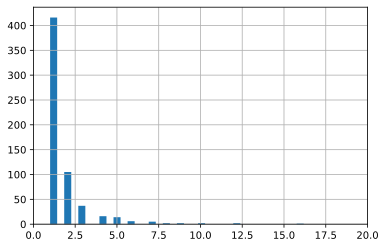

In [8]:
plt.hist(D.dfs.values(),len(norm_doc_sent))
plt.xlim([0,20])
plt.grid()
plt.show()

A la vista del histograma, vamos a filtrar todas aquellas palabras que no aparezcan en al menos dos frases.

In [9]:
no_below = 2 #Minimum number of documents to keep a term in the dictionary
no_above = .8 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

D.filter_extremes(no_below=no_below,no_above=no_above)

n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 194 terms
First terms in the dictionary:
0 : 2006
1 : game
2 : gear
3 : gears
4 : person
5 : series
6 : shooter
7 : video
8 : war
9 : 2007


In [10]:
from gensim.models import TfidfModel

corpus_bow = [D.doc2bow(doc) for doc in norm_doc_sent]

model = TfidfModel(corpus_bow)  

corpus_tfidf = model[corpus_bow]


In [11]:
from gensim.matutils import corpus2dense, corpus2csc

n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
corpus_bow_dense = corpus2dense(corpus_bow, num_terms=n_tokens, num_docs=num_docs)
# Convert TFIDF representacion
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs)

# 2.1 Resumen de texto utilizando *Latent Semantic Analysis* (LSA)

[Este método](http://www.kiv.zcu.cz/~jstein/publikace/isim2004.pdf) utiliza la descomposición en valores singulares (SVD) de la matriz TF-IDF $\mathbf{A}$ calculada anteriormente. $\mathbf{A}$ tiene dimensiones $m\times n$, donde $m$ corresponde en nuestro caso al  tamaño del diccionario (`len(D)`) y $n$ al número de documentos (frases en nuestro caso). Asumiendo $m>n$, la descomposición SVD de $\mathbf{A}$ es de la forma
$$\mathbf{A}=\mathbf{U}\mathbf{\Sigma}\mathbf{V}^T$$ 
donde

- $\mathbf{U}$ es una matriz $m\times m$ ortogonal. 
- $\mathbf{V}$ es una matriz $n\times n$ ortogonal.
- $\mathbf{\Sigma}$ es una matriz $m\times n$ con $n$ valores distintos de zero en la diagonal principal. Estos valores, $\sigma_1,\sigma_2,\ldots,\sigma_n$ son los **valores singulares**. Además, asumimos que están ordenados, de forma que $\sigma_1>\sigma_2,\ldots,\sigma_n$.

La siguiente figura ilustra la descomposición

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/1280px-Singular_value_decomposition_visualisation.svg.png' width=400 />


## Aproximación de rango-$k$ usando SVD

Si utilizamos únicamente las componentes correspondientes asociadas a los $k$ valores singulares de mayor valor, construiremos una aproximación a la matriz $\mathbf{A}$ de rango $k$:

<img src='http://www.tsc.uc3m.es/~olmos/BBVA/SVDk.png' width=700 />

Bajo esta aproximación, cada palabra está representada por un vector de dimensión $k$ $\mathbf{u}_i, i=1,\ldots,m$, cada documento (frase) por un vector de dimensión $k$ $\mathbf{v}_j, j=1,\ldots,n$ y cada elemento de $\mathbf{A}$ se aproxima como el producto escalar de dos vectores

$$a_{i,j} \approx  \mathbf{u}_i \mathbf{g}_j$$

donde $\mathbf{g}_k = \mathbf{\sigma}_{1:k} * \mathbf{v}_j$ es el producto elemento a elemento de ambos vectores. En nuestro contexto, a la dimensión latente $k$ se le denomina el **número de tópicos de la descomposición**.

## Frases más representativas

Utilizando LSA, se entenderán las frases más representativas como aquellas para las cuales la normal del vector $\mathbf{g}_k$

$$s_j \doteq ||\mathbf{g}_k||_2 = \sqrt{\sum_{u=1}^{k}\sigma_u^2 v_{j,u}^2}$$

**es mayor**. A los coeficientes $s_j, j=1,\ldots,n$ se les denomina *saliency scores*. 



Vamos a aplicar el método LSA para encontrar las frases más representativas de nuestro texto de ejemplo.


#### Cálculo de la SVD usando `scipy.sparse.linalg`

In [12]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

El número de tópicos es un hiperparámetro que debemos fijar para lanzar el método. Podemos jugar con distintos valores para ver su efecto. En general, se recomienda un número relativamente bajo (comparado con el número de documentos).

In [13]:
num_sentences = 8  # Número de frases 
num_topics = 3 # Número de tópicos

u, s, vt = low_rank_svd(corpus_tfidf_dense, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(194, 3) (3,) (3, 83)


In [14]:
singular_values

array([1.6255155, 1.7755163, 2.0798979], dtype=float32)

En el [artículo original](http://www.kiv.zcu.cz/~jstein/publikace/isim2004.pdf), proponen el siguiente heurístico para no tener en cuenta valores singulares asociados a tópicos con poca importancia. En particular, para el cálculo del *saliency score* **pondremos a cero todos aquellos valores singulares cuya magnitud esté por debajo de la mitad del valor del máximo valor singular**.

In [15]:
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

A continuación calculamos los scores 

/Users/olmos/opt/anaconda3/envs/gensim3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


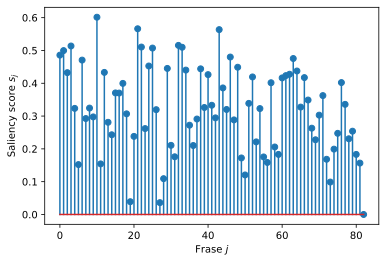

In [16]:
salience_scores = np.linalg.norm(singular_values.reshape([num_topics,1])*topic_document_mat,axis=0)
plt.stem(salience_scores)
plt.xlabel('Frase $j$')
plt.ylabel('Saliency score $s_j$')
plt.show()

Finalmente buscamos las frases con mayor score

In [17]:
top_sentence_indices = np.argsort(-salience_scores)[:num_sentences]
top_sentence_indices.sort()


In [28]:
for l in top_sentence_indices:

    print(list(doc.sents)[l])
    print('***************')
    

It was developed by Epic Games and published by Microsoft Game Studios, initially as an exclusive title for the Xbox 360 in November 2006, before a Microsoft Windows version of the game, developed in conjunction with People Can Fly, was released in 2007.
***************
The game's main story, which can be played in single or co-operative play, focuses on a squad of troops who assist in completing a desperate, last-ditch attempt to end a war against a genocidal subterranean enemy, the Locust, and save the remaining human inhabitants of their planet Sera.
***************
The game's multiplayer mode allows up to eight players to control characters from one of the two factions in a variety of online game modes.
***************


A remastered version, Gears of War: Ultimate Edition, was developed primarily by The Coalition, and brought about a number of improvements, including updates to the gameplay from later titles and enhanced graphics.
***************


Gears of War's success led to th

Podemos ver cómo algunas transformaciones matriciales nos brindan un documento resumido que cubre los aspectos principales de la descripción de nuestro juego.

# 2.2 TextRank

El algoritmo de resumen de [TextRank](https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf) utiliza internamente el popular algoritmo [PageRank](https://en.wikipedia.org/wiki/PageRank), que patentó Google en 1999. El motor de búsqueda de Google lo utiliza cuando proporciona páginas web relevantes basadas en búsquedsa. Para comprender mejor TextRank, debemos comprender algunos de los conceptos que rodean al PageRank. El algoritmo central de PageRank es un algoritmo de puntuación o clasificación basado en gráfos, en el que las páginas se puntúan o clasifican según su importancia. 

### PageRank

Los sitios web y las páginas contienen más enlaces incrustados en ellos que enlazan a más páginas que tienen más enlaces y esto continúa a través de Internet. Esto se puede representar como un modelo basado en gráfos donde los vértices indican las páginas web y las conexiones indican los enlaces entre ellos. Esto se puede usar para formar un sistema de votación o recomendación, de modo que cuando un vértice se vincula a otro en el gráfo, básicamente está emitiendo un voto. La importancia del vértice se decide no solo por el número de votos o aristas, sino también por la importancia de los vértices que están conectados a él y su importancia. Esto ayuda a determinar la puntuación o clasificación de cada vértice o página. La siguiente figura ilustra un ejemplo sencillo de PageRank:

<img src='https://upload.wikimedia.org/wikipedia/en/thumb/8/8b/PageRanks-Example.jpg/1920px-PageRanks-Example.jpg' width=400 />

En la figura anterior podemos ver que el sitio web C tiene una puntuación más alta que el sitio web E incluso si tiene menos conexiones en comparación con E, puesto que la Página B es importante y enlaza a la página C. Por lo tanto, podemos definir formalmente PageRank de la siguiente manera. Considere un gráfo dirigido representado como $G = (V, E)$ tal que $V$ representa el conjunto de vértices o páginas y $E$ representa el conjunto de enlaces. $E$ es un subconjunto de $V \times V$. Suponiendo que tenemos una página dada $V_i$ para la que queremos calcular PageRank score $PR(V_i)$, podemos definirlo matemáticamente de la siguiente manera:

$$PR(V_i) = (1-d) + d \times \sum_{j\in \text{In}(V_i)} \frac{PR(V_j)}{|\text{Out}(V_j)|}$$

donde

- $\text{In}(V_i)$ es el conjunto de páginas que enlazan a $V_i$
- $|\text{Out}(V_j)|$ es el número de conexiones salientes de $V_j$
- $d$ es el *damping factor* que toma valores en $[0,1]$. El valor $(1-d)$ representa la probabilidad de saltar desde un vértice dado a otro vértice aleatorio en el gráfo. Suele tomarse como $d=0.85$.

Partiendo de valores arbitrarios asignados a cada nodo en el gráfico, el cálculo se repite hasta que se alcanza la convergencia. 

### TextRank

Volviendo al algoritmo TextRank, al resumir un documento, tendremos un vértice por cada frase. Adicionalmente asociaremos un **peso** $w_{ij}$ a la conexión entre la frase $V_i$ y $V_j$ de tal manera que $w_{ij}$ modela la correlación entre ambos nodos del grafo. Si bien hay distintas alternativas de medir esta correlación, una medida sencilla sería 
$$w_{ij} = \mathbf{a}_i.^T \mathbf{a}_j$$
donde $\mathbf{a}_i$ es la codificación BoW o TF-IDF de la frase $i$. A continuación, TextRank modifica el score de PageRank definido anteriormente para tener en cuenta estos pesos:

$$TR(V_i) = (1-d) + d \times \sum_{j\in \text{In}(V_i)} \frac{w_{ji}TR(V_j)}{\sum_{k\in\text{Out}(V_j)}w_{jk}}$$

Una vez obtenido el score $TR$ para todas las frases, resumiremos el documento con las $k$ frases más relevantes.


### Implementación usando `networkx`

Podemos implementar TextRank de forma sencilla utilizando el paquete `networkx` y en particular la función `networkx.pagerank` a la que pasaremos directamente la matriz $\mathbf{A}\mathbf{A}.^T$:


In [29]:
similitudes = corpus_tfidf_dense@corpus_tfidf_dense.T


In [30]:
similitudes[:20,:20]

array([[0.5220902 , 0.23183358, 0.07582779, 0.1383816 , 0.13018313,
        0.14044452, 0.14608106, 0.28664687, 0.15762852, 0.14098199,
        0.09433322, 0.09075488, 0.04859216, 0.04537744, 0.05678191,
        0.09231821, 0.07623704, 0.04537744, 0.03199679, 0.04537744],
       [0.23183358, 0.6392812 , 0.16818535, 0.08016156, 0.05888241,
        0.14923824, 0.04644876, 0.17286317, 0.15159534, 0.1417924 ,
        0.18745306, 0.05771388, 0.12250657, 0.06131743, 0.08308717,
        0.0868822 , 0.0466359 , 0.02885694, 0.0564287 , 0.05046223],
       [0.07582779, 0.16818535, 0.69028276, 0.14842638, 0.16038579,
        0.13430913, 0.17997204, 0.09583472, 0.4252834 , 0.04669363,
        0.10635986, 0.        , 0.07244953, 0.07515241, 0.08466021,
        0.03638981, 0.        , 0.        , 0.02961696, 0.        ],
       [0.1383816 , 0.08016156, 0.14842638, 1.0997391 , 0.09583472,
        0.1479854 , 0.10753803, 0.09583472, 0.7231201 , 0.04669363,
        0.02382539, 0.05146632, 0.10856463, 0

In [31]:
import networkx

similarity_graph = networkx.from_numpy_array(corpus_tfidf_dense@corpus_tfidf_dense.T)
similarity_graph

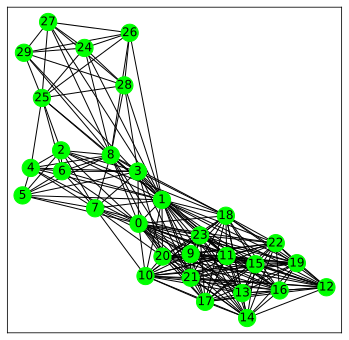

In [32]:
# Lets plot the graph for the first 30 sentences
plt.figure(figsize=(6, 6))
plot_graph = networkx.from_numpy_array(corpus_tfidf_dense[:30,:30]@corpus_tfidf_dense[:30,:30].T)
networkx.draw_networkx(plot_graph, node_color='lime')

Calculamos los scores e imprimos las frases con mayor valor:

In [33]:
scores = networkx.pagerank(similarity_graph)

scores_values = np.fromiter(scores.values(), dtype=float)

top_sentence_indices = np.argsort(-scores_values)[:num_sentences]
top_sentence_indices.sort()


In [34]:
scores

{0: 0.007215625499344045,
 1: 0.017239038526413644,
 2: 0.010610234333125409,
 3: 0.014744277971819065,
 4: 0.004620410892058417,
 5: 0.0064908684918196175,
 6: 0.004083772111749924,
 7: 0.00505065691926144,
 8: 0.01631351615374279,
 9: 0.00458707066334734,
 10: 0.009740855164284459,
 11: 0.005042680262810118,
 12: 0.009260033566365053,
 13: 0.003799364169559435,
 14: 0.00745890215524884,
 15: 0.00922942978735398,
 16: 0.004355756737510036,
 17: 0.003566637972933875,
 18: 0.007307842309871767,
 19: 0.003668813723303698,
 20: 0.005947790332351414,
 21: 0.007538763052493687,
 22: 0.0037367020390441023,
 23: 0.011217702646831515,
 24: 0.003561613010084183,
 25: 0.004953352473636169,
 26: 0.006785881689174654,
 27: 0.00612771881096927,
 28: 0.009156772526655864,
 29: 0.0038387102889609935,
 30: 0.005076904128203898,
 31: 0.008836262635349942,
 32: 0.0038416115785484374,
 33: 0.006612080796391542,
 34: 0.0038677477289426505,
 35: 0.008136010549476273,
 36: 0.0038583523641114357,
 37: 0.0045

In [36]:
for l in top_sentence_indices:

    print(list(doc.sents)[l])
    print('***************')
    

It was developed by Epic Games and published by Microsoft Game Studios, initially as an exclusive title for the Xbox 360 in November 2006, before a Microsoft Windows version of the game, developed in conjunction with People Can Fly, was released in 2007.
***************
The game's main story, which can be played in single or co-operative play, focuses on a squad of troops who assist in completing a desperate, last-ditch attempt to end a war against a genocidal subterranean enemy, the Locust, and save the remaining human inhabitants of their planet Sera.
***************
The game's multiplayer mode allows up to eight players to control characters from one of the two factions in a variety of online game modes.
***************


A remastered version, Gears of War: Ultimate Edition, was developed primarily by The Coalition, and brought about a number of improvements, including updates to the gameplay from later titles and enhanced graphics.
***************


Gears of War's success led to th

# 3. Determinación de palabras clave (keywords)

A continuación enumeramos dos técnicas sencillas para determinar palabras clave en un documento.

## 3.1 Colocaciones (Collocations)

Una colocación se puede definir como una secuencia o grupo de palabras que tienden a ocurrir con frecuencia y esta frecuencia tiende a ser más de lo que podría denominarse una ocurrencia aleatoria o casual. Las colocaciones se calculan a partir de la codificación del texto mediante **n-grams** (secuencias de n palabras consecutivas) y la posterior determinación de los n-grams más frecuentes.

NLTK proporciona funciones para encontrar las colocaciones en el texto y establecer un ranking de acuerdo a diferentes métricas (frecuencia de aparición, información mútua o log-verosimilitud, entre otras).

Vamos a determinar las **colocaciones a partir de bi-gramas** más representativas en el texto de ejemplo:


In [41]:
from nltk.collocations import BigramCollocationFinder 
from nltk.collocations import BigramAssocMeasures


finder = BigramCollocationFinder.from_words([w for s in norm_doc_sent for w in s]) # Pasamos el documento normalizado, sin dividir en frases

# Ranking: frecuencia del bi-grama

print(finder.nbest(BigramAssocMeasures.raw_freq, 10))

print('*************')

# Ranking: likelihood_ratio

print(finder.nbest(BigramAssocMeasures.likelihood_ratio, 10))



[('gears', 'war'), ('gear', 'war'), ('xbox', '360'), ('epic', 'games'), ('delta', 'squad'), ('cliff', 'bleszinski'), ('e', 'day'), ('game', 'receive'), ('planet', 'sera'), ('player', 'control')]
*************
[('gears', 'war'), ('xbox', '360'), ('epic', 'games'), ('gear', 'war'), ('delta', 'squad'), ('e', 'day'), ('planet', 'sera'), ('cliff', 'bleszinski'), ('casual', 'hardcore'), ('developers', 'conference')]


Podemos proceder de forma similar con los **tri-gramas**:

In [43]:
from nltk.collocations import TrigramCollocationFinder 
from nltk.collocations import TrigramAssocMeasures


finder = TrigramCollocationFinder.from_words([w for s in norm_doc_sent for w in s]) # Pasamos el documento normalizado, sin dividir en frases

# Ranking: frecuencia del bi-grama

print(finder.nbest(TrigramAssocMeasures.raw_freq, 10))

print('*************')

# Ranking: likelihood_ratio

print(finder.nbest(TrigramAssocMeasures.likelihood_ratio, 10))



[('game', 'developers', 'conference'), ('receive', 'universal', 'acclaim'), ('resident', 'evil', '4'), ('sequel', 'gear', 'war'), ('unreal', 'engine', '3'), ('xbox', '360', 'game'), ('10', 'million', 'accord'), ('2', '2008', 'gears'), ('2', 'officially', 'confirm'), ('20', '2008', 'release')]
*************
[('sequel', 'gears', 'war'), ('2016', 'gears', 'war'), ('gears', 'war', '2'), ('version', 'gears', 'war'), ('2011', 'gears', 'war'), ('ending', 'gears', 'war'), ('gears', 'war', 'halo'), ('gears', 'war', 'heavily'), ('gears', 'war', 'internet'), ('gears', 'war', 'judgment')]


Podemos observar como los n-grams obtenidos en el ranking dan información relevante acerca del contenido del documento. De echo, la caraterización de un texto mediante el conteo completo de sus n-grams da lugar a una representación vectorial conocida como **Bag-of-n-grams**, una extensión natural de **Bag-of-words**. 